###  Muhamma

# Importing Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [10]:
data = pd.read_csv('sales_data.csv')

### Glimpse of the dataset

In [13]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [15]:
data.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


# Data Preprocessing and Feature Engineering 

### Checking missing values 

In [17]:
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

### Descriptive Statistics 

#### Numerical Columns 

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,113036.0,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,113036.0,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,113036.0,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113036.0,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,113036.0,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,113036.0,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,113036.0,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0


#### Categorical Columns

In [29]:
data.describe(include = 'O').T

,count,unique,top,freq
Date,113036,1884,2016-03-01,288
Month,113036,12,June,11234
Age_Group,113036,4,Adults (35-64),55824
Customer_Gender,113036,2,M,58312
Country,113036,6,United States,39206
State,113036,53,California,22450
Product_Category,113036,3,Accessories,70120
Sub_Category,113036,17,Tires and Tubes,33870
Product,113036,130,Water Bottle - 30 oz.,10794


### Dimension of the Dataset 

In [35]:
data.shape

(113036, 18)

### Basic Information of the dataset 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

### Features Name 

In [43]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

# Anlysis 01: Total Sales for a specific Product category 

## Revenue for Accessories

In [26]:
data['Product_Category'].unique()


array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [28]:
prdct_cat = 'Accessories'

In [30]:
sals_acc_= data[data['Product_Category'] == prdct_cat]['Revenue'].sum()

In [32]:
print(sals_acc)

15117992


 ## Revenue for Bike 

In [61]:
prdct_cat_1= 'Bikes'

In [65]:
sals_acc_1= data[data['Product_Category'] == prdct_cat_1]['Revenue'].sum()

In [67]:
print(sals_acc_1)

61782134


## Revenue for Clothing 

In [51]:
prdct_cat_3 = 'Clothing'

In [53]:
sales_acc_3 = data[data['Product_Category']== prdct_cat_3]['Revenue'].sum()

In [59]:
print(sales_acc_3)

8370882


## Calculate Revenue groupby Product Category  

In [63]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [65]:
rev_by_cat = data.groupby('Product_Category')['Revenue'].sum()
print(rev_by_cat )

Product_Category
Accessories    15117992
Bikes          61782134
Clothing        8370882
Name: Revenue, dtype: int64


## Total Number of transactions for 'Accessories'

### Uniques values in Product Category 

In [69]:
data['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

### For Accessories

In [51]:
ass_trans = len(data[data['Product_Category'] == 'Accessories'])

In [53]:
print(ass_trans)

70120


### For Clothing 

In [73]:
cloth_trans = len(data[data['Product_Category'] == 'Clothing'])

In [75]:
print(cloth_trans)

16934


### For Bikes 

In [78]:
bike_trans = len(data[data['Product_Category'] == 'Clothing'])

In [80]:
print(bike_trans)

16934


# 02 Sales Trend for a Specific Months

## Total Sales by Each Month

In [73]:
data['Month'].unique()

array(['November', 'March', 'May', 'February', 'July', 'August',
       'September', 'January', 'December', 'June', 'October', 'April'],
      dtype=object)

### For March

In [98]:
mnth = 'March'
rev_march= data[data['Month'] == mnth]['Revenue'].sum()
print(f'Total sales for {mnth}:{sales_march}')

Total sales for March:7347164


### For April

In [100]:
mnth = 'April'
rev_april = data[data['Month'] == mnth]['Revenue'].sum()
print(f'Total sales for {mnth}:{sales_april}')

Total sales for April:7602750


### For September

In [102]:
mnth = 'September'
rev_sep= data[data['Month'] == mnth]['Revenue'].sum()
print(f'Total sales for {mnth}:{sales_sep}')

Total sales for September:5841885


## Compare revenure for month for martch and september

In [96]:
months = ['March', 'September'] 

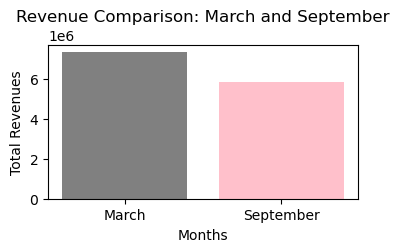

In [108]:
rev = [rev_march, rev_sep]
plt.figure(figsize=(4, 2))
plt.bar(months, rev, color=['gray', 'pink'])
plt.xlabel("Months")
plt.ylabel("Total Revenues")
plt.title("Revenue Comparison: March and September")
plt.show()

## Calculate the Average Revenue in March  

In [122]:
mnth = 'March'
avg_rev_march= data[data['Month'] == mnth]['Revenue'].mean()
print(f'Average sales for {mnth}:{avg_rev_march}')

Average sales for March:759.4752946040934


##  Month with highest Total Revenue

In [128]:
mnth_rev = {}
for mnth in data['Month'].unique():
    mnth_rev[mnth] = data[data['Month'] == mnth]['Revenue'].sum()


In [132]:
highest_mnth_rev = max(mnth_rev, key = mnth_rev.get)
highest_mnth_rev

'December'

In [136]:
high_rev = mnth_rev[highest_mnth_rev]
high_rev 

9086931

In [138]:
print(f'The month with highest total revenue is {highest_mnth_rev} with ${high_rev}')

The month with highest total revenue is December with $9086931


## Identify which month had the highest total revenue using groupby

In [143]:
revenue_by_month = data.groupby('Month')['Revenue'].sum()
highest_revenue_month = revenue_by_month.idxmax()
highest_revenue = revenue_by_month.max()

print(f"\nThe month with the highest total revenue is {highest_revenue_month} with ${highest_revenue:.2f}")



The month with the highest total revenue is December with $9086931.00


## Identify which month had the highest total revenue (without groupby)

In [107]:
monthly_revenue = {}
for month in data['Month'].unique():
    monthly_revenue[month] = data[data['Month'] == month]['Revenue'].sum()

highest_revenue_month = max(monthly_revenue, key=monthly_revenue.get)
highest_revenue = monthly_revenue[highest_revenue_month]

print(f"\nThe month with the highest total revenue is {highest_revenue_month} with {highest_revenue:.2f}")



The month with the highest total revenue is December with 9086931.00


## Sales by Countary 

## List all countries along with their total revenue.

In [151]:
revenue_by_country = data.groupby('Country')['Revenue'].sum()
print("\nTotal revenue for each country:")
revenue_by_country


Total revenue for each country:


Country
Australia         21302059
Canada             7935738
France             8432872
Germany            8978596
United Kingdom    10646196
United States     27975547
Name: Revenue, dtype: int64

## Find the country with the lowest total revenue.

In [156]:

lowest_revenue_country = data.groupby('Country')['Revenue'].sum().idxmin()
print(f"\nCountry with lowest revenue: {lowest_revenue_country}")



Country with lowest revenue: Canada


## With Maximum revenue 

In [110]:
highest_revenue_country = data.groupby('Country')['Revenue'].sum().idxmax()
print(f"\nCountry with highest revenue: {highest_revenue_country}")



Country with highest revenue: United States


## Plot a bar chart showing the revenue per country.

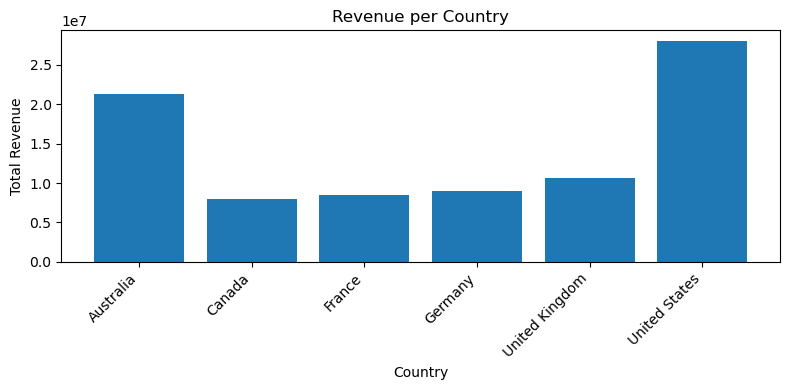

In [161]:
revenue_by_country = data.groupby('Country')['Revenue'].sum()
plt.figure(figsize=(8, 4))  
plt.bar(revenue_by_country.index, revenue_by_country.values)
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Revenue per Country")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

## Calculate the percentage of total revenue from each country.

In [168]:
total_revenue = data['Revenue'].sum()
revenue_percentage_by_country = data.groupby('Country')['Revenue'].sum() / total_revenue * 100
print("\nPercentage of total revenue from each country:")
revenue_percentage_by_country


Percentage of total revenue from each country:


Country
Australia         24.981596
Canada             9.306490
France             9.889495
Germany           10.529483
United Kingdom    12.485130
United States     32.807806
Name: Revenue, dtype: float64

### Filter transactions from a specific country and find their total profit.

In [175]:
country_to_filter = "United Kingdom"  
uk_transactions = data[data['Country'] == country_to_filter]
total_profit_uk = uk_transactions['Profit'].sum()
print(f"\nTotal profit for transactions in {country_to_filter}: {total_profit_uk}")


Total profit for transactions in United Kingdom: 4413853


# Analysis 4: Find the day with the highest sales 

## Find the Day with the Highest Sales

In [181]:
print(data.columns)


Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


In [185]:
data['Weekday'] = pd.to_datetime(data['Date']).dt.day_name()  

In [187]:
best_day = data.groupby('Weekday')['Revenue'].sum().idxmax()
print(f"\nHighest revenue occurred on: {best_day}")



Highest revenue occurred on: Saturday


##  Print total revenue for each weekday.

In [190]:
revenue_by_weekday = data.groupby('Weekday')['Revenue'].sum()
print("\nTotal revenue for each weekday:")
revenue_by_weekday



Total revenue for each weekday:


Weekday
Friday       12129932
Monday       12076562
Saturday     12560937
Sunday       12332954
Thursday     11900438
Tuesday      11994581
Wednesday    12275604
Name: Revenue, dtype: int64

## Find the day with the lowest total revenue.

In [195]:
lowest_revenue_day = data.groupby('Weekday')['Revenue'].sum().idxmin()
print(f"\nLowest revenue occurred on: {lowest_revenue_day}")


Lowest revenue occurred on: Thursday


## Plot a line chart showing revenue by weekday.

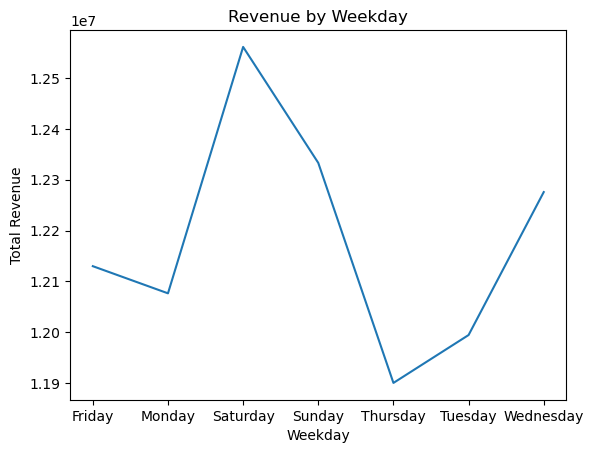

In [201]:
plt.plot(data.groupby('Weekday')['Revenue'].sum())
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.title('Revenue by Weekday')
plt.show()

## Compare weekend (Saturday & Sunday) revenue to weekday revenue.


### Calculate weekend revenue

In [206]:
weekend_revenue = data[data['Weekday'].isin(['Saturday', 'Sunday'])]['Revenue'].sum()
weekend_revenue

24893891

### Calculate weekday revenue

In [210]:
weekday_revenue = data[~data['Weekday'].isin(['Saturday', 'Sunday'])]['Revenue'].sum()
weekday_revenue

60377117

In [212]:
print(f"\nTotal weekend revenue: {weekend_revenue}")
print(f"Total weekday revenue: {weekday_revenue}")


Total weekend revenue: 24893891
Total weekday revenue: 60377117


### Create a bar chart for comparison

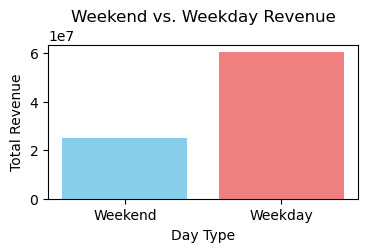

In [220]:
revenue_types = ['Weekend', 'Weekday']
revenues = [weekend_revenue, weekday_revenue]
plt.figure(figsize=(4, 2))
plt.bar(revenue_types, revenues, color=['skyblue', 'lightcoral'])
plt.xlabel("Day Type")
plt.ylabel("Total Revenue")
plt.title("Weekend vs. Weekday Revenue")
plt.show()

# Analysis 5: Total Sales from the Specific States

### Calculate total revenue for the specific state

In [228]:
state = 'California'
if state in data['State'].values:
    sales_state = data[data['State'] == state]['Revenue'].sum()
    print(f'Total revenue for {state}: {sales_state}')
else:
    print(f'\n{state} not found in the dataset. Available states include: {", ".join(data["State"].unique()[:5])}...')


Total revenue for California: 17672620


### Calculate Total Revenue for two other States

In [231]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Weekday'],
      dtype='object')

In [233]:
data['State'].unique()

array(['British Columbia', 'New South Wales', 'Victoria', 'Oregon',
       'California', 'Saarland', 'Seine Saint Denis', 'Moselle',
       'Queensland', 'England', 'Nord', 'Washington', 'Hessen',
       'Nordrhein-Westfalen', 'Hamburg', 'Loir et Cher', 'Kentucky',
       'Seine (Paris)', 'South Australia', 'Loiret', 'Alberta', 'Bayern',
       'Hauts de Seine', 'Yveline', 'Essonne', "Val d'Oise", 'Tasmania',
       'Seine et Marne', 'Val de Marne', 'Pas de Calais',
       'Charente-Maritime', 'Garonne (Haute)', 'Brandenburg', 'Texas',
       'New York', 'Florida', 'Somme', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Ontario',
       'Wyoming', 'Missouri', 'Montana', 'Utah', 'Minnesota',
       'Mississippi', 'Massachusetts', 'Arizona', 'Alabama'], dtype=object)

In [235]:
states = ['Saarland', 'Seine Saint Denis', 'Moselle']

In [245]:
for state in states: 
    if state in data['State'].values:
        sales_rev = data[data['State'] == state]['Revenue'].sum()
        print(f'\nTotal revenue from {state}: {sales_rev}')


Total revenue from Saarland: 2029545

Total revenue from Seine Saint Denis: 1131634

Total revenue from Moselle: 266223


## Compare revenue across all states using a simple plot

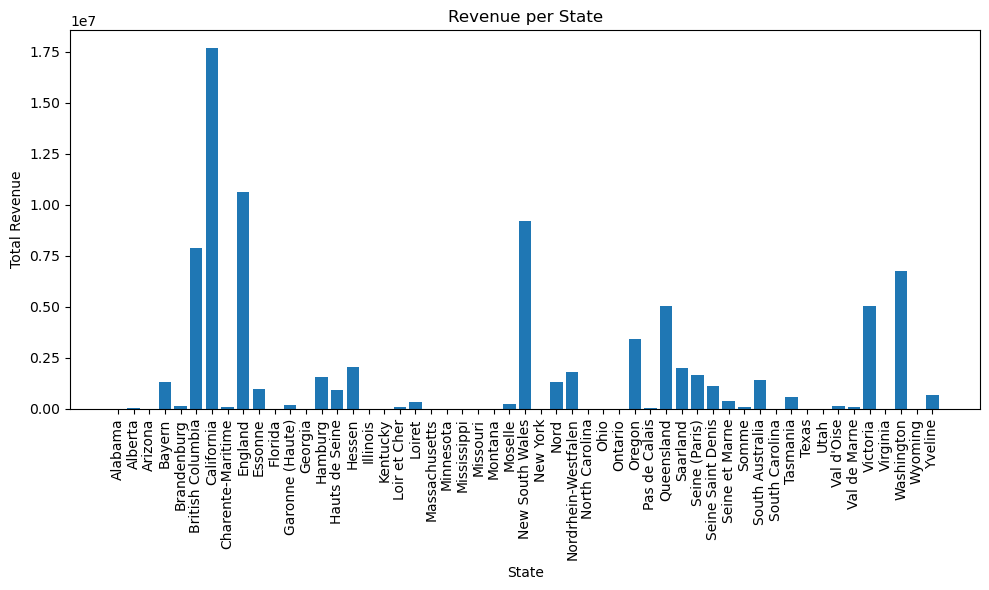

In [115]:
revenue_by_state = data.groupby('State')['Revenue'].sum()
plt.figure(figsize=(10, 6))  
plt.bar(revenue_by_state.index, revenue_by_state.values)
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.title("Revenue per State")
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()


# Analysis 06: Average Revenue by Gender 

In [118]:
avg_revenue_female = data[data['Customer_Gender'] == 'F']['Revenue'].mean()
print(avg_revenue_female)

766.310923909071


## Determine the average revenue per transaction for a chosen state

In [121]:
state = "California"  
if state in data['State'].values:
    state_data = data[data['State'] == state]
    avg_revenue_per_transaction = state_data['Revenue'].mean()
    print(f"\nAverage revenue per transaction in {state}: {avg_revenue_per_transaction}")
else:
    print(f"\nState '{state}' not found in the dataset.")



Average revenue per transaction in California: 787.1991091314031


## Compute the average revenue from male customers

In [124]:
avg_revenue_male = data[data['Customer_Gender'] == 'M']['Revenue'].mean()
print(f"Average revenue from male customers: {avg_revenue_male}")

Average revenue from male customers: 743.1645115928111


## Compare the average revenue of male vs. female customers

In [127]:
avg_revenue_female = data[data['Customer_Gender'] == 'F']['Revenue'].mean()
print(f"Average revenue from female customers: {avg_revenue_female}")
print(f"Comparison (Male vs. Female): {avg_revenue_male:.2f} vs. {avg_revenue_female:.2f}")

Average revenue from female customers: 766.310923909071
Comparison (Male vs. Female): 743.16 vs. 766.31


## Calculate the median revenue for female customers

In [130]:
median_revenue_female = data[data['Customer_Gender'] == 'F']['Revenue'].median()
print(f"Median revenue for female customers: {median_revenue_female}")

Median revenue for female customers: 211.0


# Analysis 7: Number of Transactions for a Specific Product

In [133]:
specific_product = "Hitch Rack - 4-Bike"
if specific_product in data['Product'].values:
    product_count = data[data['Product'] == specific_product].shape[0]
    print(f"\nNumber of transactions involving {specific_product}: {product_count}")
else:
    print(f"\n{specific_product} not found in the dataset. Sample products include: {', '.join(df['Product'].unique()[:3])}...")



Number of transactions involving Hitch Rack - 4-Bike: 596


## Count the number of transactions for a specific product

In [136]:
product_name = "Mountain Bike"  # change this to your desired product

if product_name in data['Product'].values:
    product_count = data[data['Product'] == product_name].shape[0]
    print(f"The number of transactions for '{product_name}' is {product_count}.")
else:
    print(f"'{product_name}' not found in the dataset.")


'Mountain Bike' not found in the dataset.


## Compare the count of transactions between two different products.

In [139]:
product1 = "Mountain Bike"
product2 = "Road Bike"

count1 = data[data['Product'] == product1].shape[0]
count2 = data[data['Product'] == product2].shape[0]

print(f"Transactions for '{product1}': {count1}")
print(f"Transactions for '{product2}': {count2}")

if count1 > count2:
    print(f"'{product1}' has more transactions.")
elif count2 > count1:
    print(f"'{product2}' has more transactions.")
else:
    print(f"'{product1}' and '{product2}' have the same number of transactions.")


Transactions for 'Mountain Bike': 0
Transactions for 'Road Bike': 0
'Mountain Bike' and 'Road Bike' have the same number of transactions.


## Calculate the proportion of transactions for a specific product to total transactions.

In [142]:
product_name = "Mountain Bike"
total_transactions = data.shape[0]
product_transactions = data[data['Product'] == product_name].shape[0]

if total_transactions > 0:
    proportion = product_transactions / total_transactions
    print(f"The proportion of transactions for '{product_name}' is {proportion:.2%}.")
else:
    print("No transactions in the dataset.")


The proportion of transactions for 'Mountain Bike' is 0.00%.


## Identify transactions for a specific product that exceed a certain revenue.

In [151]:
product_name = "Mountain Bike"
revenue_threshold = 500  

high_revenue_data = data[(data['Product'] == product_name) & (data['Revenue'] > revenue_threshold)]

print(f"Transactions for '{product_name}' with revenue above {revenue_threshold}:")
print(high_revenue_data)


Transactions for 'Mountain Bike' with revenue above 500:
Empty DataFrame
Columns: [Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []


## Filter transactions for a specific product by year and count them.

In [156]:
product_name = "Mountain Bike"
year_to_filter = 2021  

year_filtered_df = data[(data['Product'] == product_name) & (data['Year'] == year_to_filter)]
year_count = year_filtered_df.shape[0]

print(f"There are {year_count} '{product_name}' transactions in the year {year_to_filter}.")


There are 0 'Mountain Bike' transactions in the year 2021.


# Analysis 8: Find the most sold category

In [159]:
most_sold_category = data['Product_Category'].value_counts().idxmax()
print(f"\nMost sold product category: {most_sold_category}")



Most sold product category: Accessories


## List product categories in descending order of transaction frequency

In [162]:
category_counts = data['Product_Category'].value_counts()
print("Product categories in order of transaction frequency:")
print(category_counts)


Product categories in order of transaction frequency:
Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64


## Find the product category with the second highest transaction frequency

In [165]:
category_counts = data['Product_Category'].value_counts()

if len(category_counts) < 2:
    print("Not enough categories to determine the second highest frequency.")
else:
    second_most_sold_category = category_counts.index[1]
    second_most_sold_count = category_counts.values[1]
    print(f"Second most sold product category: {second_most_sold_category} "
          f"with {second_most_sold_count} transactions.")


Second most sold product category: Bikes with 25982 transactions.


# Analysis 9: Sales by age group

## Compare total sales made by different age groups

In [169]:
age_group_sales = data.groupby('Age_Group')['Revenue'].sum()
print("\nTotal sales by age group:")
for age_group, sales in age_group_sales.items():
  print(sales)



Total sales by age group:
42584153
308042
30655614
11723199


## Number of transactions per age group


In [173]:
transactions_by_age_group = data.groupby('Age_Group')['Revenue'].count()
print("Number of transactions per age group:")
print(transactions_by_age_group)


Number of transactions per age group:
Age_Group
Adults (35-64)          55824
Seniors (64+)             730
Young Adults (25-34)    38654
Youth (<25)             17828
Name: Revenue, dtype: int64


## Average revenue by age group

In [180]:

average_revenue_by_age_group = data.groupby('Age_Group')['Revenue'].mean()
print("\nAverage revenue by age group:")
print(average_revenue_by_age_group)



Average revenue by age group:
Age_Group
Adults (35-64)          762.828765
Seniors (64+)           421.975342
Young Adults (25-34)    793.077405
Youth (<25)             657.572302
Name: Revenue, dtype: float64


## Filter transactions by age group and revenue threshold

In [185]:

target_age_group = 'Young Adults (18-34)'  
revenue_threshold = 500

filtered_df = data[
    (data['Age_Group'] == target_age_group) &
    (data['Revenue'] > revenue_threshold)
]

print(f"\nTransactions for '{target_age_group}' with revenue above {revenue_threshold}:")
print(filtered_df)



Transactions for 'Young Adults (18-34)' with revenue above 500:
Empty DataFrame
Columns: [Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []


## Pie chart of revenue contribution by age group

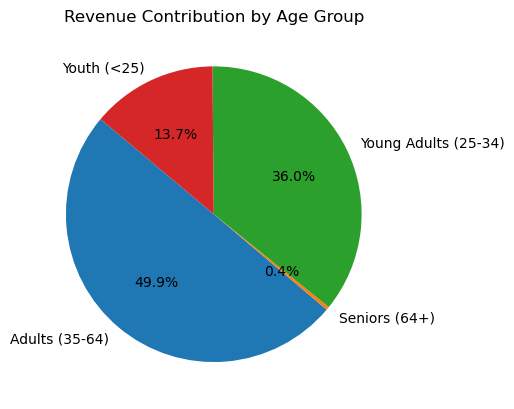

In [188]:
age_group_sales = data.groupby('Age_Group')['Revenue'].sum()
age_group_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title("Revenue Contribution by Age Group")
plt.ylabel("")  
plt.show()


# Analysis 10: Find the Least Sold Product Sub-Category

In [191]:
least_sold_subcategory = data['Sub_Category'].value_counts().idxmin()
print(f"\nLeast sold product sub-category: {least_sold_subcategory}")



Least sold product sub-category: Bike Stands


## List sub-categories in ascending order of frequency

In [194]:
subcat_counts_ascending = data['Sub_Category'].value_counts(ascending=True)
print("Product sub-categories in ascending order of frequency:")
print(subcat_counts_ascending)


Product sub-categories in ascending order of frequency:
Sub_Category
Bike Stands            456
Bike Racks             592
Vests                  964
Socks                 1122
Hydration Packs       1334
Shorts                1794
Cleaners              1802
Gloves                2686
Touring Bikes         3698
Fenders               4032
Caps                  4358
Jerseys               6010
Mountain Bikes        8854
Helmets              12158
Road Bikes           13430
Bottles and Cages    15876
Tires and Tubes      33870
Name: count, dtype: int64


## Find the least sold sub-category

In [197]:

least_sold_subcategory = data['Sub_Category'].value_counts().idxmin()


least_sold_subcat_revenue = data[data['Sub_Category'] == least_sold_subcategory]['Revenue'].sum()
print(f"Total revenue for the least sold product sub-category ({least_sold_subcategory}): {least_sold_subcat_revenue}")


Total revenue for the least sold product sub-category (Bike Stands): 344075


## Identify least sold and most sold sub-categories

In [200]:
least_sold_subcategory = data['Sub_Category'].value_counts().idxmin()
transactions_by_year_least_sold = (
    data[data['Sub_Category'] == least_sold_subcategory]
    .groupby('Year')
    .size() 
)

print("Number of transactions for the least sold sub-category by year:")
print(transactions_by_year_least_sold)


Number of transactions for the least sold sub-category by year:
Year
2013    119
2014    109
2015    119
2016    109
dtype: int64


## Plot a bar chart highlighting the least sold product sub-category compared to others.

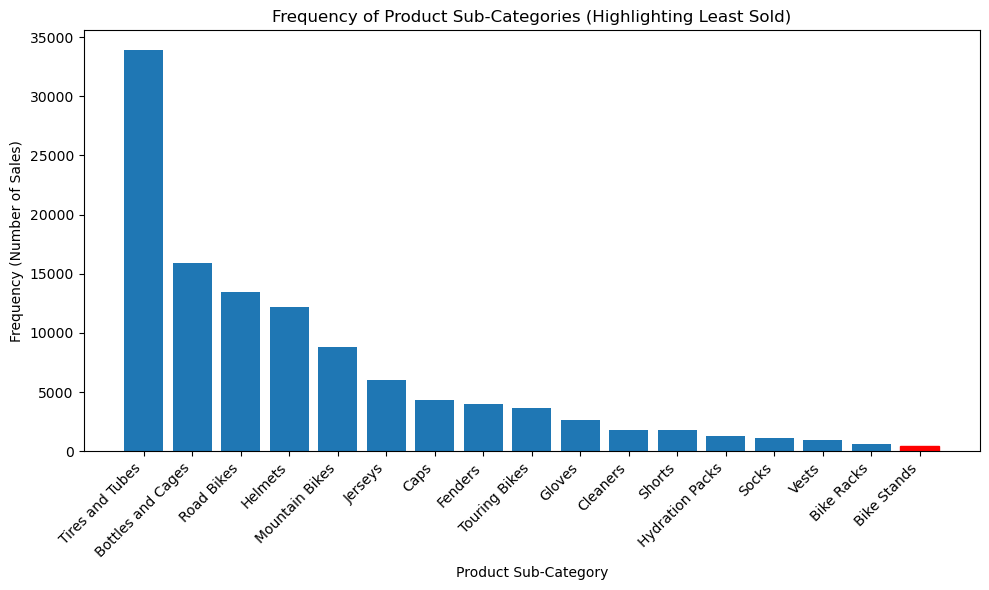

In [204]:
subcat_counts = data['Sub_Category'].value_counts()
subcat_counts_df = subcat_counts.reset_index()
subcat_counts_df.columns = ['Sub_Category', 'Count']
least_sold_subcategory = data['Sub_Category'].value_counts().idxmin()

plt.figure(figsize=(10, 6))
bars = plt.bar(subcat_counts_df['Sub_Category'], subcat_counts_df['Count'])
for i, subcat in enumerate(subcat_counts_df['Sub_Category']):
    if subcat == least_sold_subcategory:
        bars[i].set_color('red')  

plt.xticks(rotation=45, ha='right')
plt.xlabel("Product Sub-Category")
plt.ylabel("Frequency (Number of Sales)")
plt.title("Frequency of Product Sub-Categories (Highlighting Least Sold)")
plt.tight_layout()
plt.show()


# Analysis 11: Find the Most Common Age Group

In [208]:
most_common_age_group = data['Age_Group'].value_counts().idxmax()
print(f"\nMost common age group: {most_common_age_group}")



Most common age group: Adults (35-64)


## List age groups and their counts

In [211]:
age_group_counts = data['Age_Group'].value_counts()
print("Age groups and their counts:")
print(age_group_counts)


Age groups and their counts:
Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64


## Identify the least common age group

In [214]:
least_common_age_group = data['Age_Group'].value_counts().idxmin()
print(f"\nLeast common age group: {least_common_age_group}")



Least common age group: Seniors (64+)


## Calculate total revenue by age group

In [217]:
total_revenue_by_age_group = data.groupby('Age_Group')['Revenue'].sum()
print("\nTotal revenue by age group:")
print(total_revenue_by_age_group)



Total revenue by age group:
Age_Group
Adults (35-64)          42584153
Seniors (64+)             308042
Young Adults (25-34)    30655614
Youth (<25)             11723199
Name: Revenue, dtype: int64


## Bar chart of age group frequency

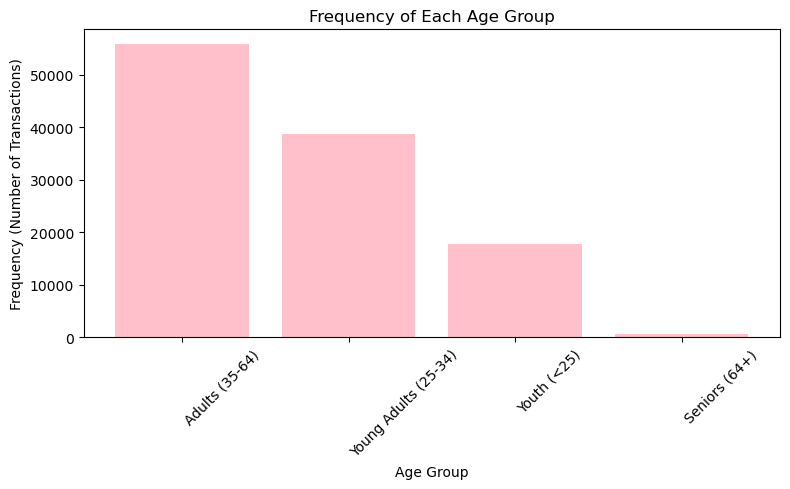

In [224]:
age_group_counts = data['Age_Group'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values, color='pink')
plt.xlabel("Age Group")
plt.ylabel("Frequency (Number of Transactions)")
plt.title("Frequency of Each Age Group")
plt.xticks(rotation=45, ha='left')
plt.tight_layout()
plt.show()


# Analysis 13: Sales Comparison: Different Years 

In [227]:
year_sales = data.groupby('Year')['Revenue'].sum()
print("\nSales by Year:")
for year, sales in year_sales.items():
    print(f"Year {year}: {sales}")



Sales by Year:
Year 2011: 8964888
Year 2012: 9175983
Year 2013: 15240037
Year 2014: 14152724
Year 2015: 20023991
Year 2016: 17713385


## Calculate total revenue for each year-month combination


In [230]:
year_month_sales = data.groupby(['Year', 'Month'])['Revenue'].sum()

print("Total revenue for each year-month combination:")
print(year_month_sales)



Total revenue for each year-month combination:
Year  Month   
2011  April        698782
      August       880037
      December    1132666
      February     637598
      January      675193
                   ...   
2016  January     2553065
      July         499960
      June        3586300
      March       2608663
      May         3264343
Name: Revenue, Length: 62, dtype: int64


## Determine the year with the highest sales

In [235]:
year_sales = data.groupby('Year')['Revenue'].sum()
max_sales_year = year_sales.idxmax()
max_sales_value = year_sales.max()
print(max_sales_value)

20023991


## Plot a bar chart of total revenue by year

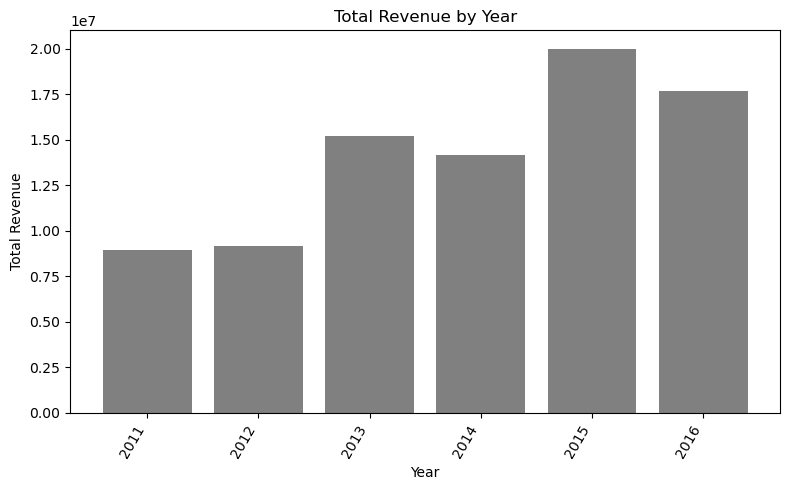

In [245]:
year_sales = data.groupby('Year')['Revenue'].sum()
plt.figure(figsize=(8, 5))
plt.bar(year_sales.index, year_sales.values, color='gray')
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Year")
plt.xticks(year_sales.index, rotation=60, ha='right') 
plt.tight_layout()
plt.show()


## Average revenue per transaction by year

In [248]:
average_revenue_by_year = data.groupby('Year')['Revenue'].mean()
print("Average revenue per transaction by year:")
print(average_revenue_by_year)


Average revenue per transaction by year:
Year
2011    3348.856182
2012    3427.711244
2013     623.492902
2014     481.417920
2015     819.211676
2016     602.537077
Name: Revenue, dtype: float64


# Analysis 13: Highest Profit by Product Category


In [251]:
highest_profit_category = data.groupby('Product_Category')['Profit'].sum().idxmax()
print(f"\nHighest profit product category: {highest_profit_category}")



Highest profit product category: Bikes


## Print total profit for each product category

In [254]:
profit_by_category = data.groupby('Product_Category')['Profit'].sum()
print("Total profit by product category:")
print(profit_by_category)


Total profit by product category:
Product_Category
Accessories     8862377
Bikes          20519276
Clothing        2839447
Name: Profit, dtype: int64


## Calculate profit margin for each product category

In [257]:
data['Profit_Margin'] = data['Profit'] / data['Revenue']
profit_margin_by_category = data.groupby('Product_Category')['Profit_Margin'].mean()

print("\nAverage profit margin by product category:")
print(profit_margin_by_category)



Average profit margin by product category:
Product_Category
Accessories    0.564864
Bikes          0.326013
Clothing       0.314919
Name: Profit_Margin, dtype: float64


## Bar chart of total profit by product category

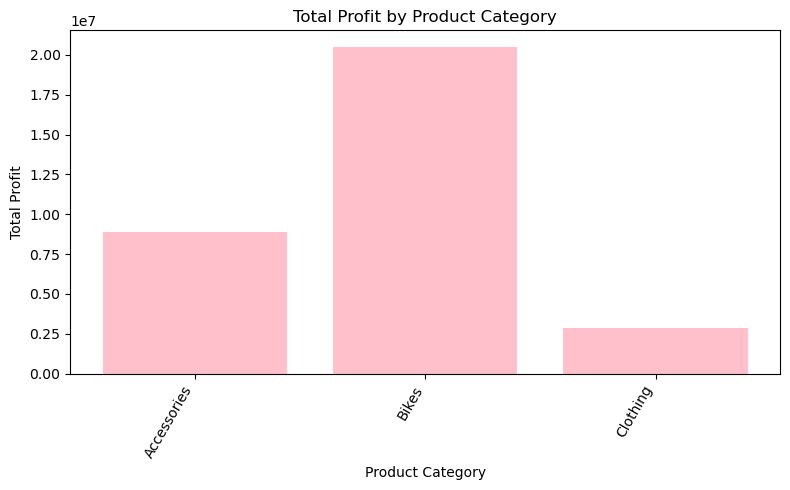

In [262]:
profit_by_category = data.groupby('Product_Category')['Profit'].sum()
plt.figure(figsize=(8, 5))
plt.bar(profit_by_category.index, profit_by_category.values, color='pink')
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.title("Total Profit by Product Category")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


# Analysis 14: Find the Most Profitable Transaction

In [267]:
most_expensive = data.loc[data['Revenue'].idxmax()]
print("\nMost expensive transaction details:")
print(most_expensive)



Most expensive transaction details:
Date                             2015-07-24
Day                                      24
Month                                  July
Year                                   2015
Customer_Age                             52
Age_Group                    Adults (35-64)
Customer_Gender                           M
Country                           Australia
State                            Queensland
Product_Category                   Clothing
Sub_Category                          Vests
Product             Touring-1000 Yellow, 50
Order_Quantity                           29
Unit_Cost                              1482
Unit_Price                             2384
Profit                                15096
Cost                                  42978
Revenue                               58074
Profit_Margin                      0.259944
Name: 112073, dtype: object


In [269]:

profit_threshold = 1000  

high_profit_transactions = data[data['Profit'] > profit_threshold]
print(f"\nTransactions with profit above {profit_threshold}:")
print(high_profit_transactions)



Transactions with profit above 1000:
              Date  Day      Month  Year  Customer_Age             Age_Group  \
2       2014-03-23   23      March  2014            49        Adults (35-64)   
3       2016-03-23   23      March  2016            49        Adults (35-64)   
8       2014-02-22   22   February  2014            35        Adults (35-64)   
9       2016-02-22   22   February  2016            35        Adults (35-64)   
30      2014-03-13   13      March  2014            48        Adults (35-64)   
...            ...  ...        ...   ...           ...                   ...   
112978  2013-09-08    8  September  2013            31  Young Adults (25-34)   
112979  2015-09-08    8  September  2015            31  Young Adults (25-34)   
112994  2013-10-25   25    October  2013            37        Adults (35-64)   
113022  2014-03-20   20      March  2014            34  Young Adults (25-34)   
113023  2016-03-20   20      March  2016            34  Young Adults (25-34)   

 

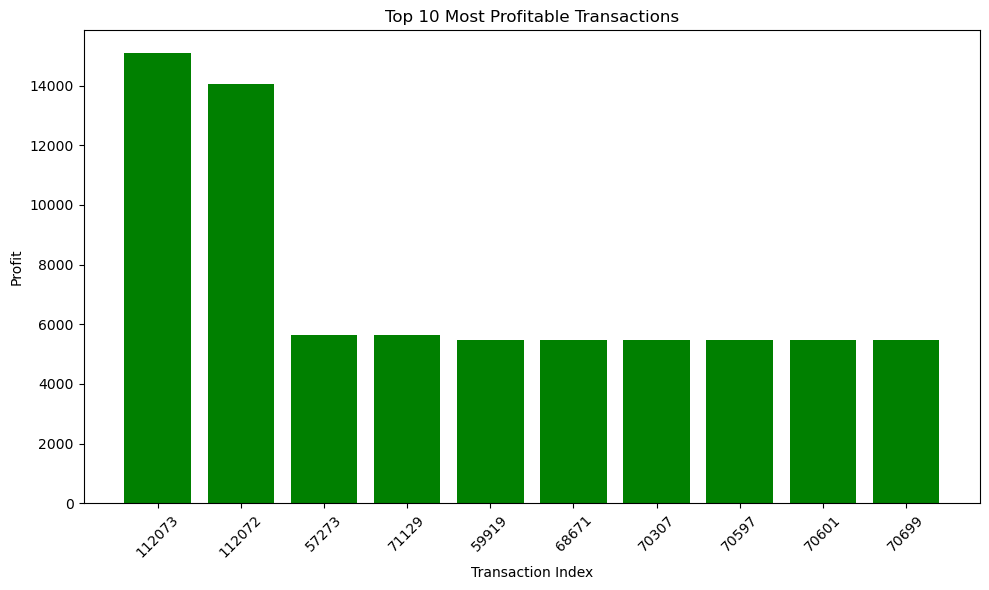

In [271]:
top_10_profitable = data.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
plt.bar(top_10_profitable.index.astype(str), top_10_profitable['Profit'], color='green')
plt.xlabel("Transaction Index")
plt.ylabel("Profit")
plt.title("Top 10 Most Profitable Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
